In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
import os
import matplotlib.ticker as ticker
%run ../utilities/heatmap.py

In [5]:
ts_TPMs = pd.read_csv("../_data/in_vitro/Read_counts/TPMs.csv", index_col="Unnamed: 0")
ts_TPMs = ts_TPMs.rename(index = str, columns = {"Unnamed: 0" : "ORF"})
mali_TPMs = pd.read_csv("../_data/in_vivo/Read_counts/TPMs.csv", index_col = "Unnamed: 0")
mali_TPMs = mali_TPMs.rename(index = str, columns = {"Unnamed: 0" : "ORF"})
annos = pd.read_csv("../_data/Annotations/PFD3D7_annos.csv", index_col="Unnamed: 0" )
mali_sampleTable = pd.read_csv("../_data/in_vivo/Sample_table/sampleTable.csv", usecols=['sampleName','Genotype'])

stageGenes = pd.read_csv("../_data/in_vitro/Stage-specific_genes/stageGenes_.csv", index_col="Unnamed: 0")
ring = stageGenes['Ring'].dropna().unique().tolist()
troph = stageGenes['Trophozoite'].dropna().unique().tolist()
schizont = stageGenes['Schizont'].dropna().unique().tolist()

In [7]:
ring_exp = ts_TPMs[(ts_TPMs > 1000).any(1)]
ring_exp = ring_exp.reindex(ring).dropna()

troph_exp = ts_TPMs[(ts_TPMs > 1000).any(1)]
troph_exp = troph_exp.reindex(troph).dropna()

schizont_exp = ts_TPMs[(ts_TPMs > 1000).any(1)]
schizont_exp = schizont_exp.reindex(schizont).dropna()

In [33]:
timePoints = range(3,51,3)
AA13_3D7_ts_df = ts_TPMs.iloc[:,:16]
AA13_3D7_ts_df.columns = timePoints 
AA17_3D7_ts_df = ts_TPMs.iloc[:,16:32]
AA17_3D7_ts_df.columns = timePoints 
AS15_3D7_ts_df = ts_TPMs.iloc[:,32:48]
AS15_3D7_ts_df.columns = timePoints 
AS16_3D7_ts_df = ts_TPMs.iloc[:,48:64]
AS16_3D7_ts_df.columns = timePoints 

AA13_FUP_ts_df = ts_TPMs.iloc[:,64:80]
AA13_FUP_ts_df.columns = timePoints 
AA17_FUP_ts_df = ts_TPMs.iloc[:,80:96]
AA17_FUP_ts_df.columns = timePoints 
AS18_FUP_ts_df = ts_TPMs.iloc[:,96:112]
AS18_FUP_ts_df.columns = timePoints 
AS19_FUP_ts_df = ts_TPMs.iloc[:,112:128]
AS19_FUP_ts_df.columns = timePoints 

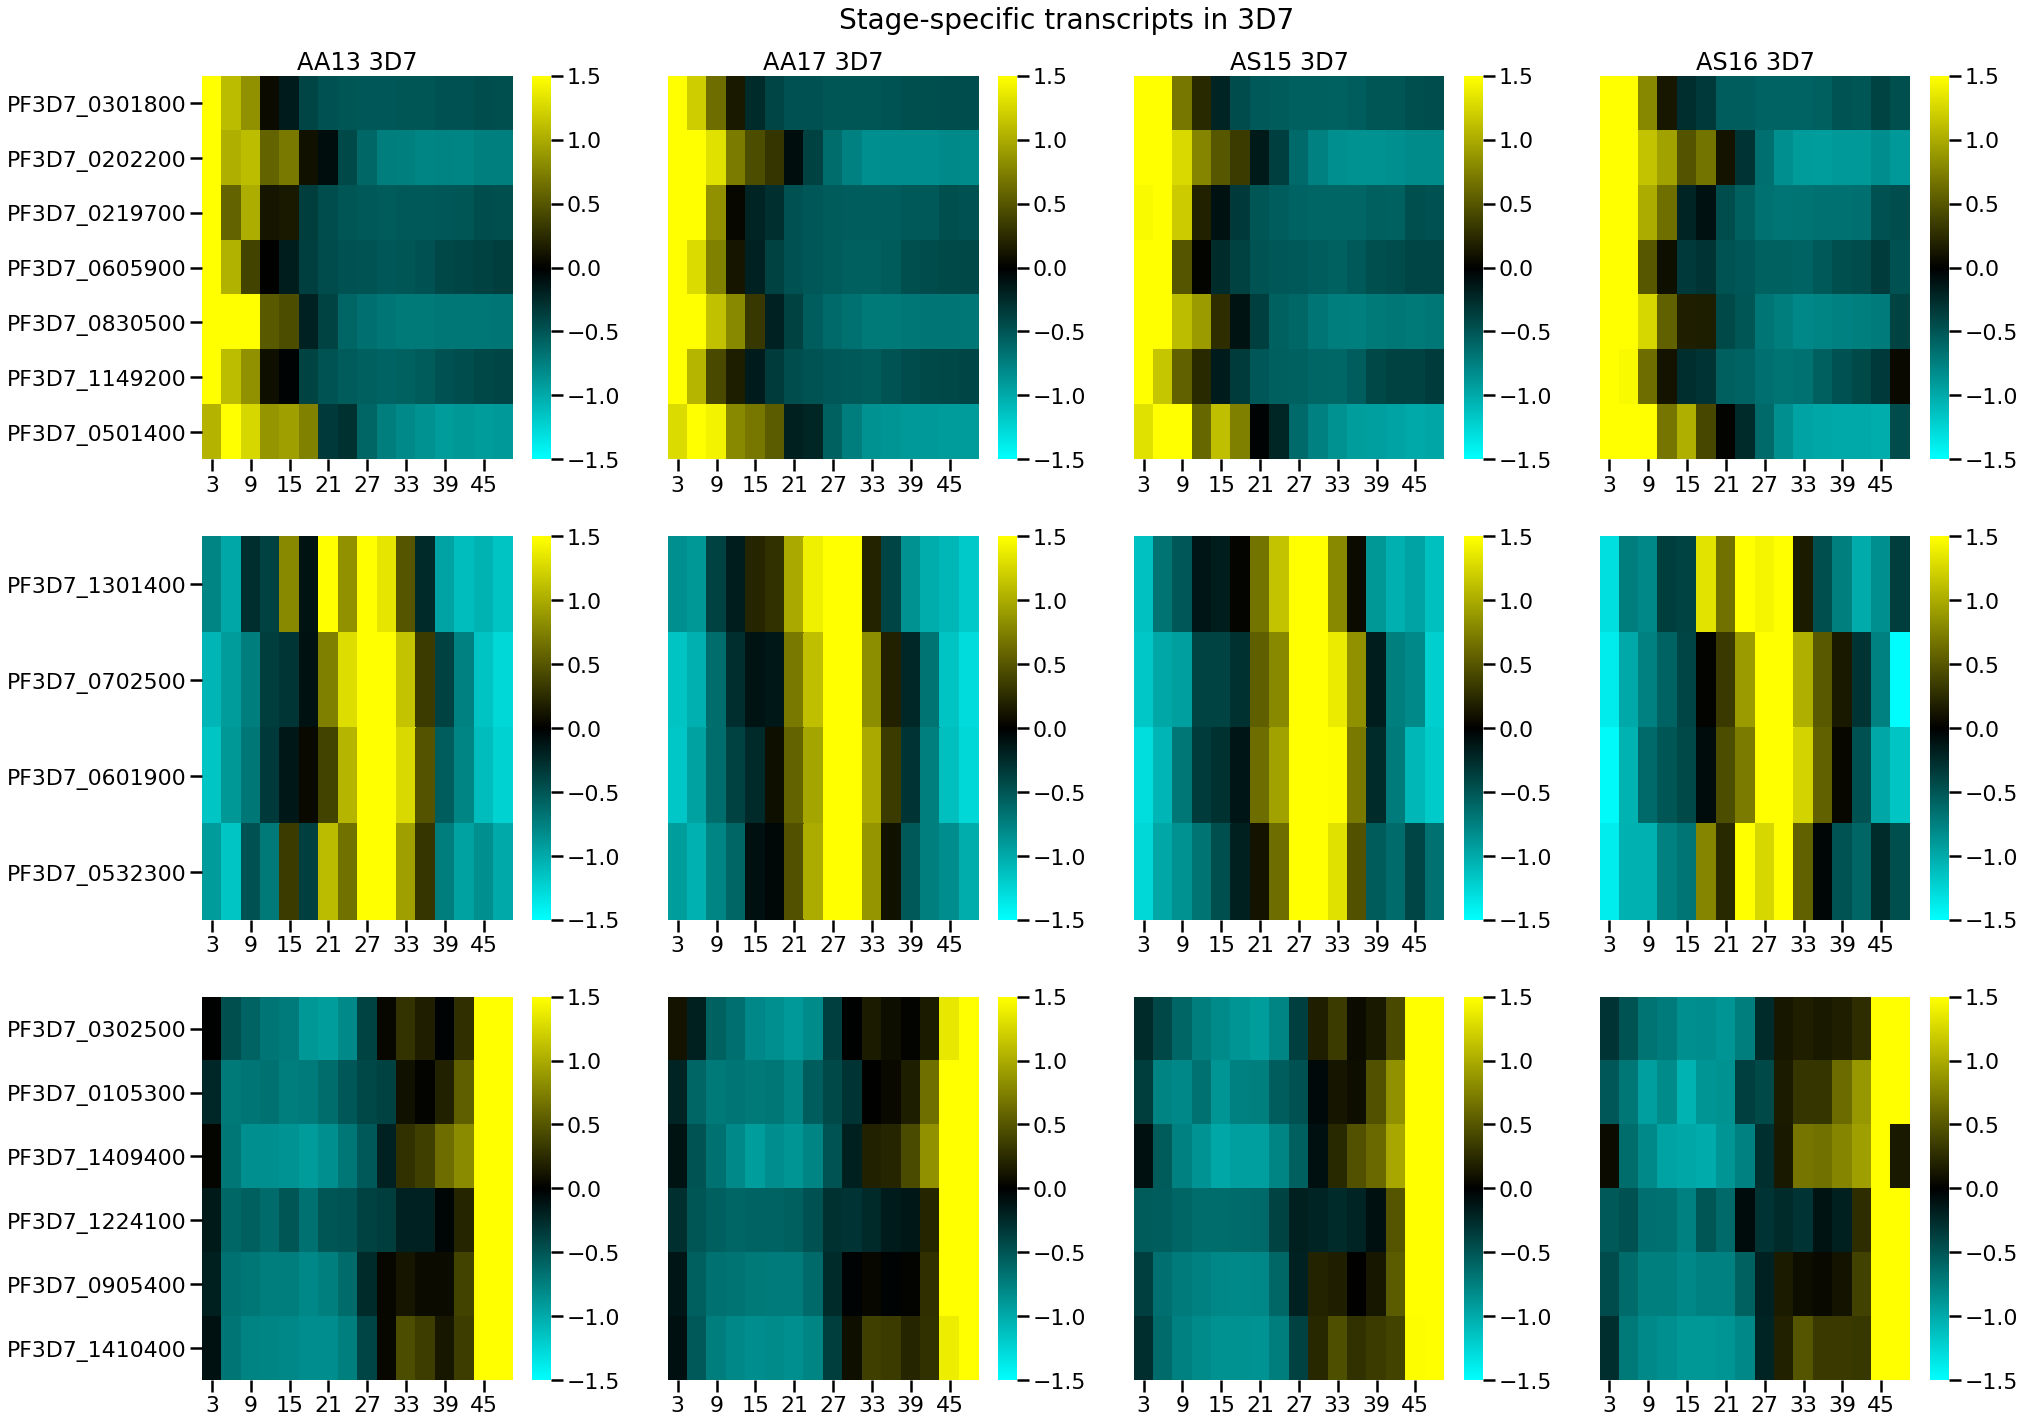

In [44]:
sns.set_context("poster")
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(ncols=4, nrows=3, figsize=(32, 24))

ringGenes_3D7 = ring_exp.index.to_list()
trophGenes_3D7 = troph_exp.index.to_list()
schizontGenes_3D7 = schizont_exp.index.to_list()

fig.suptitle('Stage-specific transcripts in 3D7', fontsize=28, y = 0.92)
aa133D7_heat_rings = heatmap_max(AA13_3D7_ts_df, ringGenes_3D7, 16, yticks=True, axis=ax1)
ax1.title.set_text('AA13 3D7'.format(len(ringGenes_3D7)))
aa173D7_heat_rings = heatmap_order(AA17_3D7_ts_df, aa133D7_heat_rings.tolist(), axis=ax2)
ax2.title.set_text('AA17 3D7'.format(len(ringGenes_3D7)))
AS153D7_heat_rings = heatmap_order(AS15_3D7_ts_df, aa133D7_heat_rings.tolist(), axis=ax3)
ax3.title.set_text('AS15 3D7'.format(len(ringGenes_3D7)))
AS163D7_heat_rings = heatmap_order(AS16_3D7_ts_df, aa133D7_heat_rings.tolist(), axis=ax4)
ax4.title.set_text('AS16 3D7'.format(len(ringGenes_3D7)))

aa133D7_heat_troph = heatmap_max(AA13_3D7_ts_df, trophGenes_3D7, 16, yticks=True, axis=ax5)
aa173D7_heat_troph = heatmap_order(AA17_3D7_ts_df, aa133D7_heat_troph.tolist(), axis=ax6)
AS153D7_heat_troph = heatmap_order(AS15_3D7_ts_df, aa133D7_heat_troph.tolist(), axis=ax7)
AS163D7_heat_troph = heatmap_order(AS16_3D7_ts_df, aa133D7_heat_troph.tolist(), axis=ax8)

aa133D7_heat_schiz = heatmap_max(AA13_3D7_ts_df, schizontGenes_3D7, 16, yticks=True, axis=ax9)
aa173D7_heat_schiz = heatmap_order(AA17_3D7_ts_df, aa133D7_heat_schiz.tolist(), axis=ax10)
AS153D7_heat_schiz = heatmap_order(AS15_3D7_ts_df, aa133D7_heat_schiz.tolist(), axis=ax11)
AS163D7_heat_schiz = heatmap_order(AS16_3D7_ts_df, aa133D7_heat_schiz.tolist(), axis=ax12)

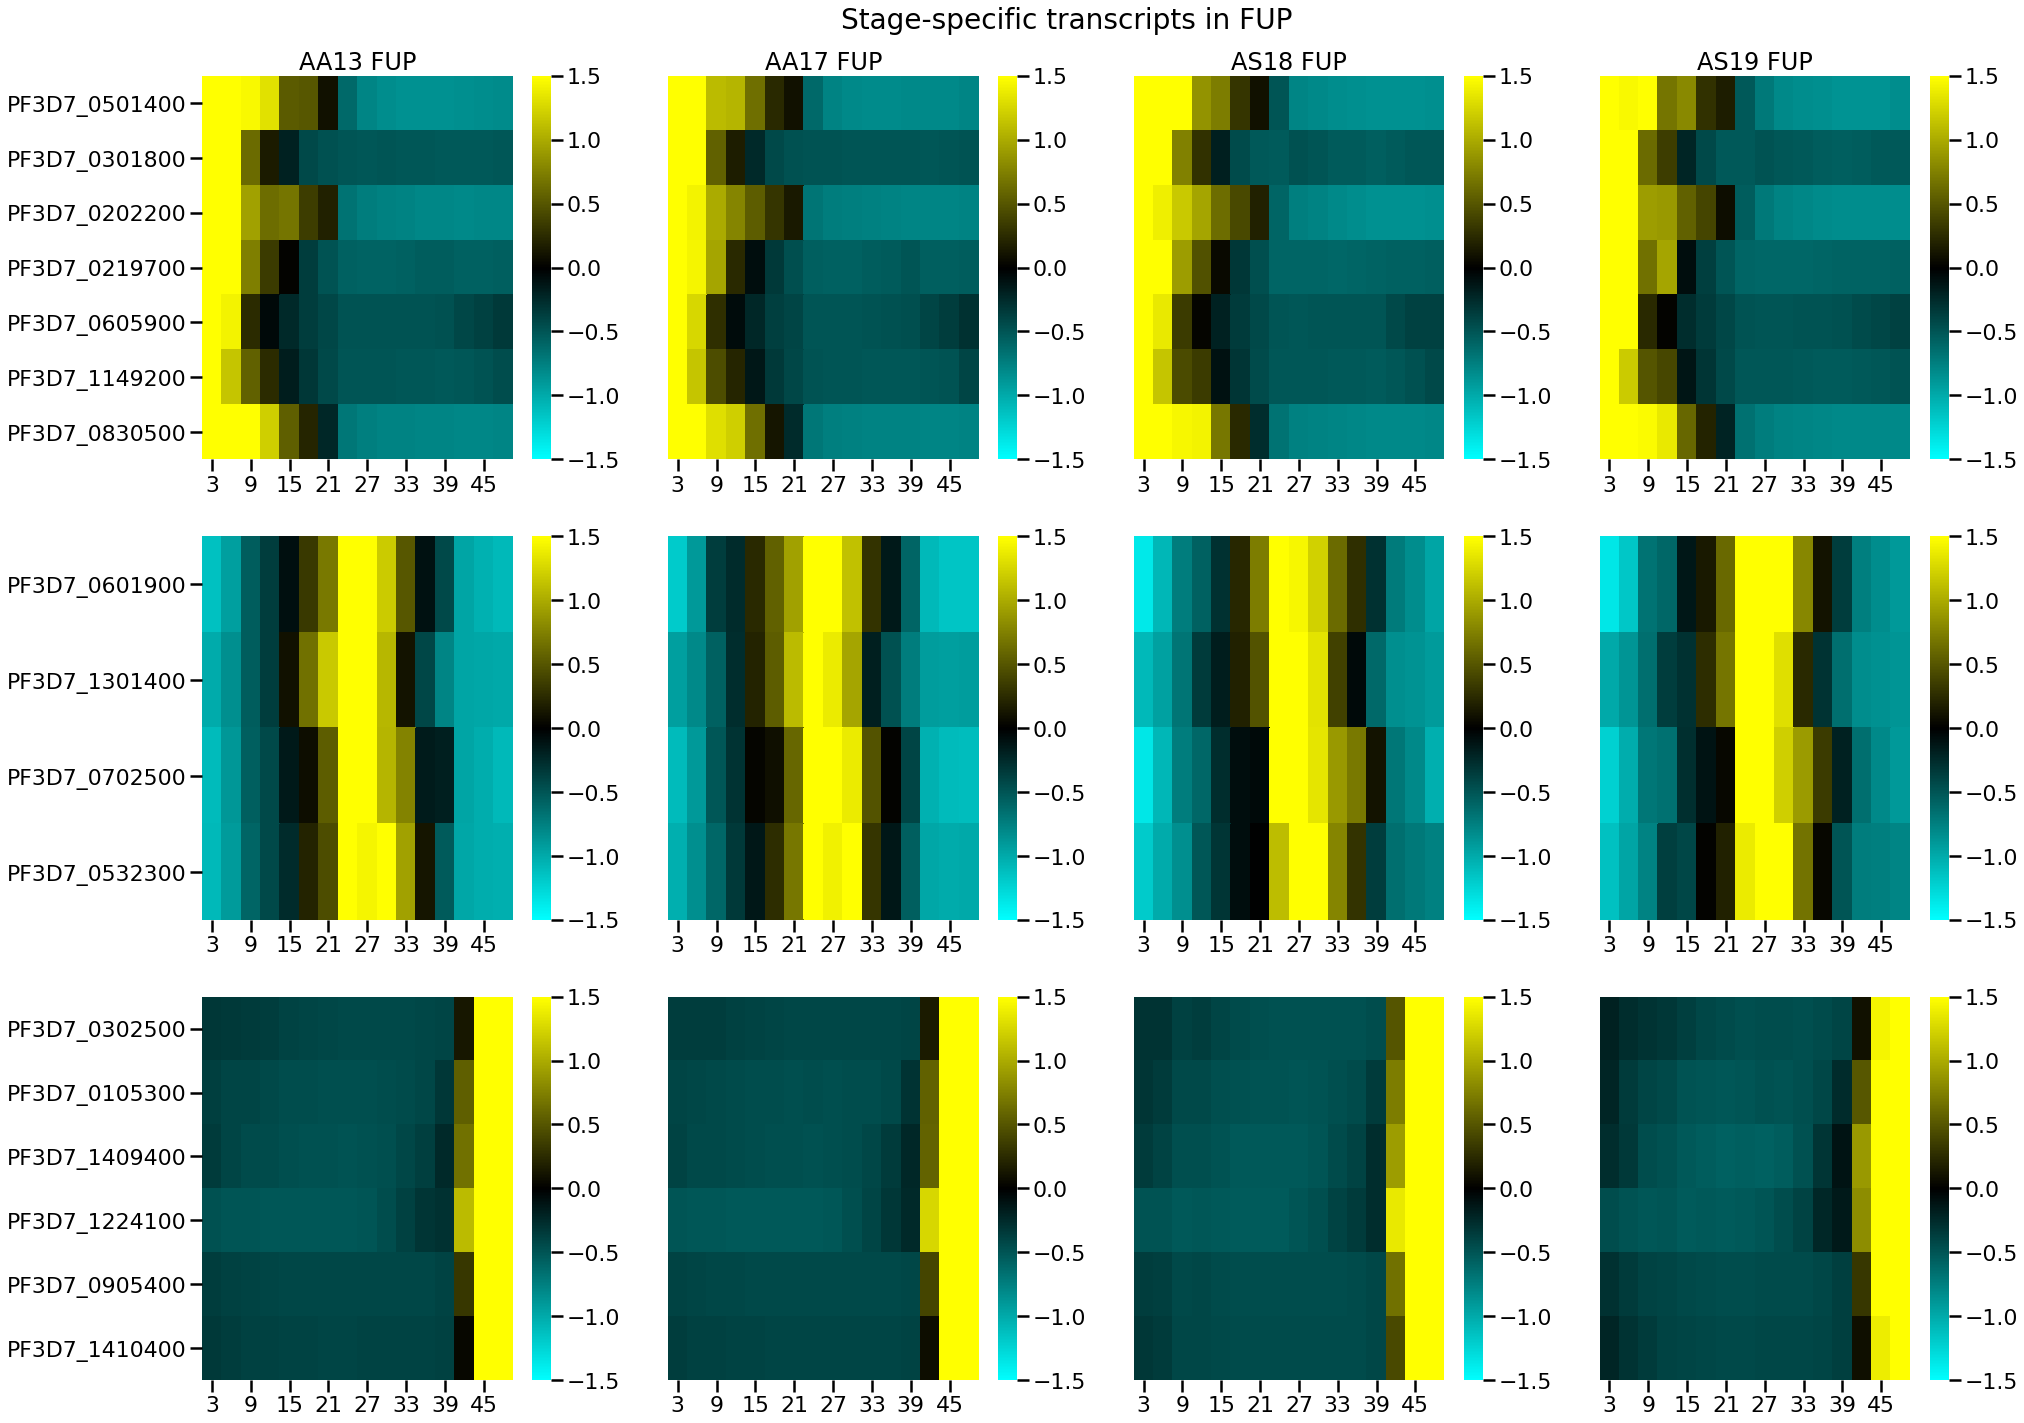

In [34]:
sns.set_context("poster")
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(ncols=4, nrows=3, figsize=(32, 24))

ringGenes_FUP = ring_exp.index.to_list()
trophGenes_FUP = troph_exp.index.to_list()
schizontGenes_FUP = schizont_exp.index.to_list()

fig.suptitle('Stage-specific transcripts in FUP', fontsize=28, y = 0.92)
aa13FUP_heat_rings = heatmap_max(AA13_FUP_ts_df, ringGenes_FUP, 16, yticks=True, axis=ax1)
ax1.title.set_text('AA13 FUP'.format(len(ringGenes_FUP)))
aa17FUP_heat_rings = heatmap_order(AA17_FUP_ts_df, aa13FUP_heat_rings.tolist(), axis=ax2)
ax2.title.set_text('AA17 FUP'.format(len(ringGenes_FUP)))
AS18FUP_heat_rings = heatmap_order(AS18_FUP_ts_df, aa13FUP_heat_rings.tolist(), axis=ax3)
ax3.title.set_text('AS18 FUP'.format(len(ringGenes_FUP)))
AS19FUP_heat_rings = heatmap_order(AS19_FUP_ts_df, aa13FUP_heat_rings.tolist(), axis=ax4)
ax4.title.set_text('AS19 FUP'.format(len(ringGenes_FUP)))

aa13FUP_heat_troph = heatmap_max(AA13_FUP_ts_df, trophGenes_FUP, 16, yticks=True, axis=ax5)
aa17FUP_heat_troph = heatmap_order(AA17_FUP_ts_df, aa13FUP_heat_troph.tolist(), axis=ax6)
AS18FUP_heat_troph = heatmap_order(AS18_FUP_ts_df, aa13FUP_heat_troph.tolist(), axis=ax7)
AS19FUP_heat_troph = heatmap_order(AS19_FUP_ts_df, aa13FUP_heat_troph.tolist(), axis=ax8)

aa13FUP_heat_schiz = heatmap_max(AA13_FUP_ts_df, schizontGenes_FUP, 16, yticks=True, axis=ax9)
aa17FUP_heat_schiz = heatmap_order(AA17_FUP_ts_df, aa13FUP_heat_schiz.tolist(), axis=ax10)
AS18FUP_heat_schiz = heatmap_order(AS18_FUP_ts_df, aa13FUP_heat_schiz.tolist(), axis=ax11)
AS19FUP_heat_schiz = heatmap_order(AS19_FUP_ts_df, aa13FUP_heat_schiz.tolist(), axis=ax12)

In [42]:
stage = pd.DataFrame(ring, columns=['ORF'])
stage['Stage'] = "Ring"
troph_df = pd.DataFrame(troph, columns=['ORF'])
troph_df['Stage'] = "Trophozoite"
stage = stage.append(troph_df, ignore_index=True)
schizont_df = pd.DataFrame(schizont, columns=['ORF'])
schizont_df['Stage'] = "Schizont"
stage = stage.append(schizont_df, ignore_index=True)

In [43]:
stage_exp = pd.DataFrame(ring_exp.index.to_list(), columns=['ORF'])
stage_exp['Stage'] = "Ring"
troph_exp_df = pd.DataFrame(troph_exp.index.to_list(), columns=['ORF'])
troph_exp_df['Stage'] = "Trophozoite"
stage_exp = stage_exp.append(troph_exp_df, ignore_index=True)
schizont_exp_df = pd.DataFrame(schizont_exp.index.to_list(), columns=['ORF'])
schizont_exp_df['Stage'] = "Schizont"
stage_exp = stage_exp.append(schizont_exp_df, ignore_index=True)

In [38]:
mali_stage_genes = mali_TPMs.loc[stage['ORF'].tolist()]
mali_stage_genes = mali_stage_genes.reset_index()
mali_stage_genes = mali_stage_genes.rename(columns = {'index' : 'ORF'})
mali_stage_genes = mali_stage_genes.melt(id_vars=['ORF'] , var_name='Sample', value_name='TPM')
mali_stage_genes = mali_stage_genes.merge(
    stage_exp[['ORF', 'Stage']], 
    left_on='ORF', 
    right_on='ORF', 
    how='inner')
mali_stage_genes = mali_stage_genes.merge(
    mali_sampleTable[['sampleName','Genotype']],
    left_on = 'Sample',
    right_on = 'sampleName')
mali_stage_genes = mali_stage_genes.drop(['sampleName'], axis=1)

Text(0.5, 0.98, 'Expression of stage-specific transcripts in HbAA $\\it{in}$ $\\it{vivo}$ isolates')

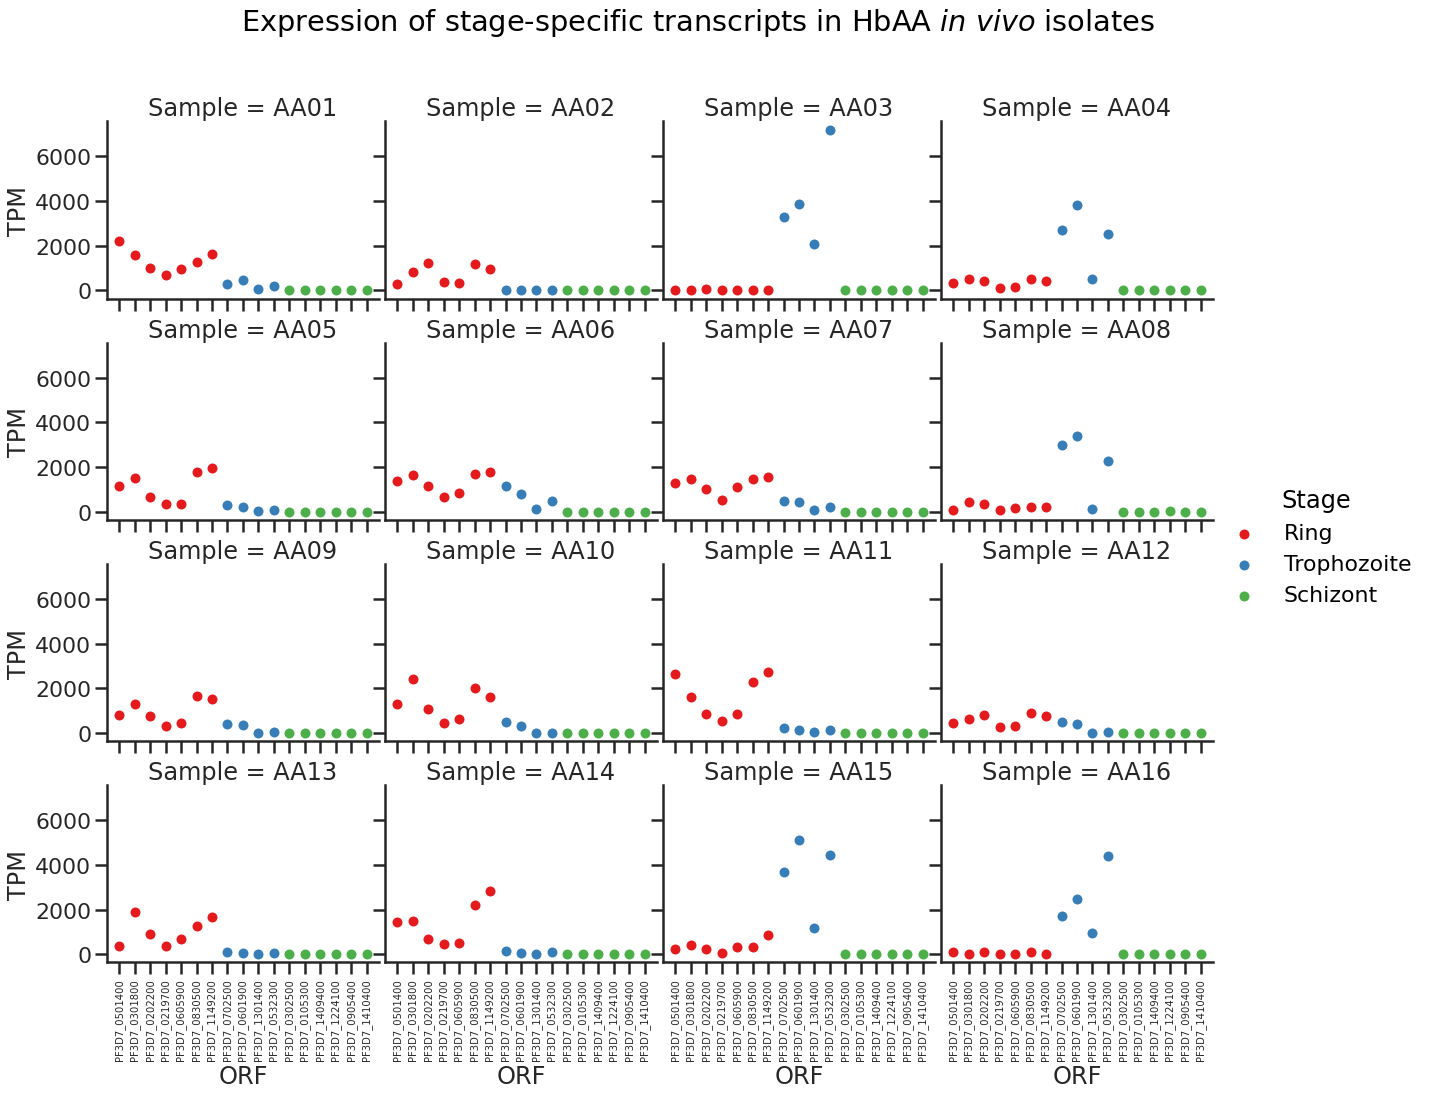

In [41]:
sns.set_context("poster")
with sns.axes_style("ticks"):
    g = sns.FacetGrid(mali_stage_genes[mali_stage_genes['Genotype'] == "AA"] , col="Sample", col_wrap=4, hue='Stage', margin_titles=True, height=4, aspect=1.1,legend_out=True, palette="Set1")
g.map(plt.scatter, "ORF", "TPM", edgecolor="white").add_legend();#, lw=.5);

for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize = 10, fontweight = 20)
g.fig.subplots_adjust(wspace=.02, hspace=.25);
plt.gcf().subplots_adjust(bottom=0.15, top=0.88)
g.fig.suptitle('Expression of stage-specific transcripts in HbAA $\it{in}$ $\it{vivo}$ isolates')

In [49]:
sums = mali_stage_genes.groupby(['Sample', 'Stage']).TPM.agg('sum').to_frame('Sum of transcripts').reset_index()
sums_agg = sums.groupby(['Sample', 'Stage']).agg({'Sum of transcripts': 'sum'})
sums_trans = sums.groupby(['Sample']).agg({'Sum of transcripts': 'sum'})
sums_norm = sums_agg.div(sums_trans, level = 'Sample') * 100
mali_stage_genes_norm = sums_norm.reset_index().rename(columns= {"Sum of transcripts":"Percent of transcripts"})

In [50]:
from matplotlib.colors import ListedColormap
pal = ['#e41a1c','#377eb8' , '#4daf4a']
my_cmap = ListedColormap(sns.color_palette(pal).as_hex())

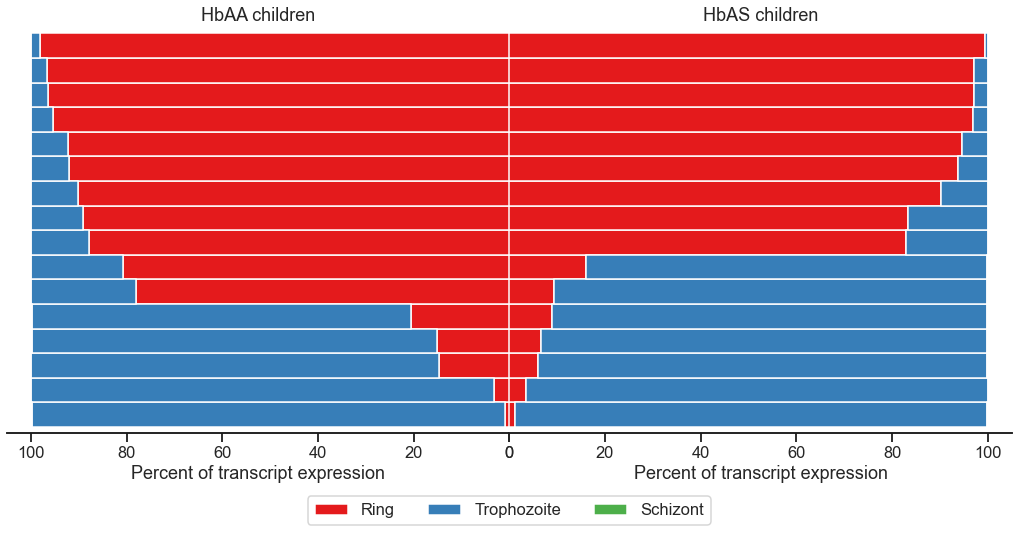

In [51]:
sns.set_context("talk")
sns.set_style("white", {"axes.facecolor": '1', 'axes.edgecolor': '.1', 'xtick.bottom': True, 'ytick.left': False, "despine" : True})
colors = sns.color_palette('Set1')
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(18,8))
AA_norm = mali_stage_genes_norm[:48].pivot(index="Sample", columns = "Stage", values="Percent of transcripts")
AA_norm = AA_norm[['Ring', 'Trophozoite', 'Schizont']]
AS_norm = mali_stage_genes_norm[48:].pivot(index="Sample", columns = "Stage", values="Percent of transcripts")
AS_norm = AS_norm[['Ring', 'Trophozoite', 'Schizont']]
AA_norm = AA_norm.sort_values(by="Ring", ascending=True)
AS_norm = AS_norm.sort_values(by="Ring", ascending=True)
AA_norm.plot(kind="barh", stacked=True, legend=False, colormap=my_cmap, width=1, ax = axes[0])
AS_norm.plot(kind="barh", stacked=True, legend=False, colormap=my_cmap, width=1, ax = axes[1])
axes[0].set_xlabel('Percent of transcript expression')
axes[1].set_xlabel('Percent of transcript expression')
axes[0].invert_xaxis()
axes[0].tick_params(labelleft=False)
axes[0].set_ylabel("")
axes[1].tick_params(labelright=False)
axes[1].tick_params(labelleft=False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].set_ylabel("")
axes[0].set_title('HbAA children')
axes[1].set_title('HbAS children')
labels = ["Ring", "Trophozoite", "Schizont"]
fig.legend(labels=labels, loc="lower center", ncol=3)
plt.subplots_adjust(wspace = 0.0, bottom=.175)

In [46]:
TPMs = pd.read_csv("../_data/in_vitro/Read_counts/TPMs.csv")
TPMs = TPMs.rename(index = str, columns = {"Unnamed: 0" : "ORF"})
TPMs = TPMs.set_index("ORF")
exp_stage_genes = TPMs.loc[stage_exp['ORF'].tolist()]
exp_stage_genes = exp_stage_genes.reset_index()

annos = pd.read_csv("../_data/Annotations/PFD3D7_annos.csv")
annos = annos.drop(['Unnamed: 0'], axis =1)
sampleTable = pd.read_csv("../_data/in_vitro/Sample_table/sampleTable.csv")

#rename the melted data columns not named as id_vars
exp_stage_genes = exp_stage_genes.melt(id_vars=['ORF'] , var_name='Sample', value_name='TPM')
exp_stage_genes = exp_stage_genes.merge(
    sampleTable[['sampleName', 'Genotype', 'HPI', 'Strain', 'Patient', 'ID']], 
    left_on='Sample', 
    right_on='sampleName', 
    how='inner')
exp_stage_genes = exp_stage_genes.drop('Sample', axis=1)

exp_stage_genes = exp_stage_genes.merge(
    stage_exp[['ORF', 'Stage']], 
    left_on='ORF', 
    right_on='ORF', 
    how='inner')

exp_stage_genes = exp_stage_genes.merge(
    annos[['ORF', 'GENENAME']], 
    left_on='ORF', 
    right_on='ORF', 
    how='inner')

exp_stage_genes = exp_stage_genes[['sampleName', 'ID', 'Patient', 'Genotype', 'Strain','HPI', 'ORF', 'TPM', 'Stage', 'GENENAME']]

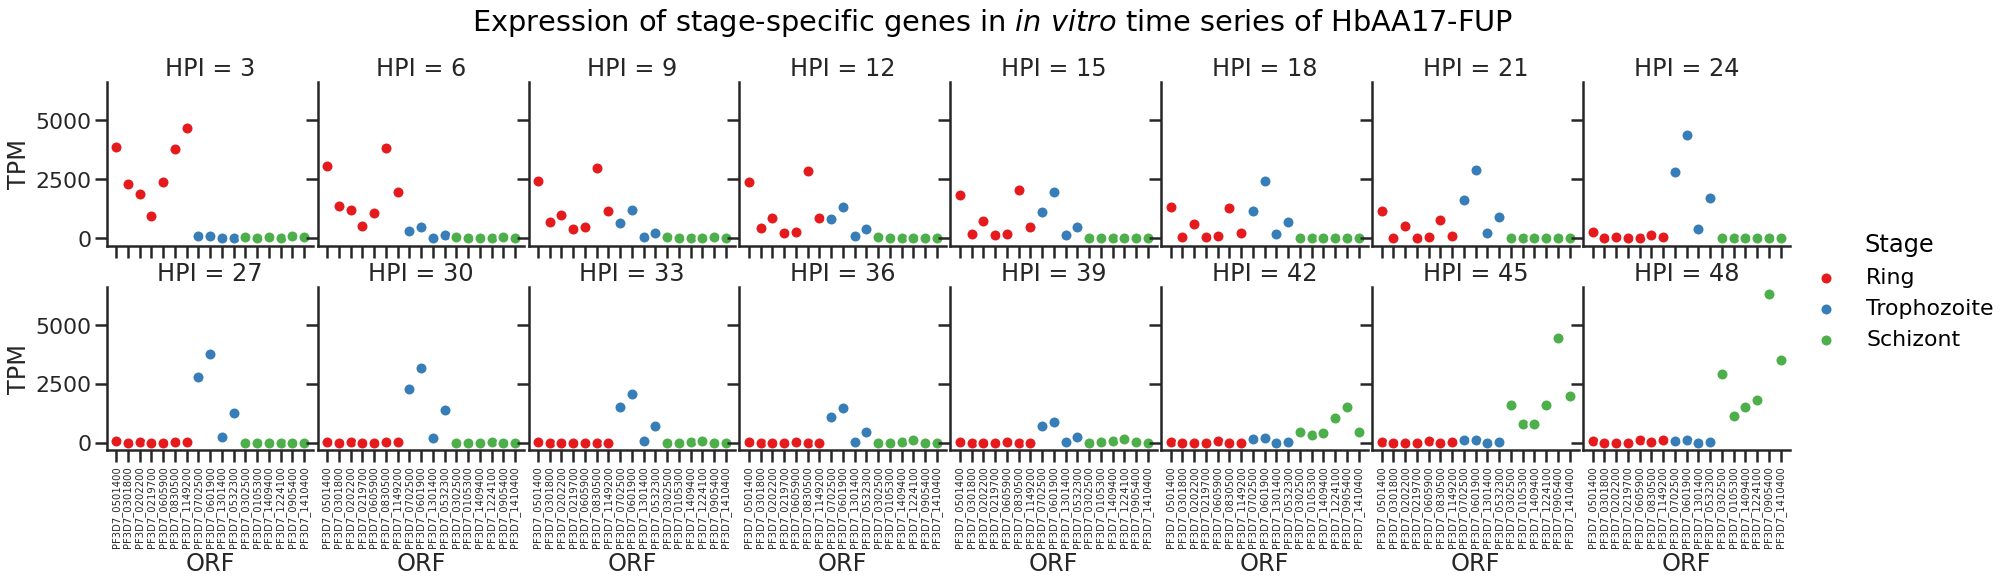

In [47]:
sns.set_context("poster")
isolate = 'AA17_FUP'
with sns.axes_style("ticks"):
    g = sns.FacetGrid(exp_stage_genes[((exp_stage_genes["ID"] == isolate))] , col="HPI", col_wrap=8, hue='Stage', margin_titles=True, height=4, aspect=.8,legend_out=True, palette='Set1')
g.map(plt.scatter, "ORF", "TPM", edgecolor="white").add_legend();#, lw=.5);

for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize = 10, fontweight = 20)
g.fig.subplots_adjust(wspace=.02, hspace=.25);

g.fig.suptitle("Expression of stage-specific genes in $\it{in}$ $\it{vitro}$ time series of HbAA17-FUP")
plt.gcf().subplots_adjust(top=0.85, bottom=0.21)